In [13]:
%load_ext autoreload
%autoreload 2

import numpy as np
import h5py
import matplotlib.pyplot as plt
import unyt as u

import richio
richio.plots.use_nice_style()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Get G in RICH units, which will be close to one anyway but the key is the unit. Calculating G is more of a sanity check. That we have the correct units, correct value.

In [14]:
G = (1*richio.units.mscale/richio.units.mscale*u.G).in_base('rich')
if np.abs(G.value - 1) < 1e-3: 
    print(f"G={G}, close to 1.")
else:
    print("Something is wrong.")

G=0.9999869408000002 code_length**3/(code_mass*code_time**2), close to 1.


In [15]:
Mbh = 10**4 * richio.units.mscale

Rg = G*Mbh / u.c**2
print("Gravitational radius:", Rg) # Schwarzschild radius is two times of this

Gravitational radius: 0.021216901388875248 code_length


In [4]:
!ls /data1/projects/pi-rossiem/TDE_data/R0.47M0.5BH10000beta1S60n1.5ComptonHiResNewAMR/

snap_100  snap_117  snap_134  snap_151	snap_37  snap_54  snap_71  snap_88
snap_101  snap_118  snap_135  snap_21	snap_38  snap_55  snap_72  snap_89
snap_102  snap_119  snap_136  snap_22	snap_39  snap_56  snap_73  snap_90
snap_103  snap_120  snap_137  snap_23	snap_40  snap_57  snap_74  snap_91
snap_104  snap_121  snap_138  snap_24	snap_41  snap_58  snap_75  snap_92
snap_105  snap_122  snap_139  snap_25	snap_42  snap_59  snap_76  snap_93
snap_106  snap_123  snap_140  snap_26	snap_43  snap_60  snap_77  snap_94
snap_107  snap_124  snap_141  snap_27	snap_44  snap_61  snap_78  snap_95
snap_108  snap_125  snap_142  snap_28	snap_45  snap_62  snap_79  snap_96
snap_109  snap_126  snap_143  snap_29	snap_46  snap_63  snap_80  snap_97
snap_110  snap_127  snap_144  snap_30	snap_47  snap_64  snap_81  snap_98
snap_111  snap_128  snap_145  snap_31	snap_48  snap_65  snap_82  snap_99
snap_112  snap_129  snap_146  snap_32	snap_49  snap_66  snap_83
snap_113  snap_130  snap_147  snap_33	snap_50  snap_67  sna

In [16]:
# snapnum = 100
t_all = []
er_all = []
for snapnum in range(21, 151, 3):
    path = f'/data1/projects/pi-rossiem/TDE_data/R0.47M0.5BH10000beta1S60n1.5ComptonHiResNewAMR/snap_{snapnum}'
    snap = richio.load(path)

    t = snap.time
    print(t)
    t_all.append(t)

    # Load particle data
    rho = snap.density
    x = snap.cm_x
    y = snap.cm_y
    z = snap.cm_z

    vx = snap.vx
    vy = snap.vy
    vz = snap.vz

    V = snap.volume
    # All we need is density, r, v

    # mask = snap.mask_star_ratio()
    # den = den[mask]
    # x = x[mask]
    # y = y[mask]
    # z = z[mask]
    # vx = vx[mask]
    # vy = vy[mask]
    # vz = vz[mask]     # Masking does not reduce the number of negative e2s

    rr = np.stack([x, y, z], axis=-1)
    vv = np.stack([vx, vy, vz], axis=-1)

    j = np.cross(rr, vv)

    r = np.sqrt(x**2 + y**2 + z**2)

    epsilon = 0.5 * (vx**2 + vy**2 + vz**2) - G * Mbh / (r) #- 2*Rg)

    j2 = j[:,0]**2 + j[:,1]**2 + j[:,2]**2      # |j|^2

    # Eccentricity
    e = np.sqrt(1 + 2*epsilon*j2/(G*Mbh)**2)

    # mass of each cells
    m = rho*V

    bins = np.linspace(0, 3, 100)
    emhist, bin_edges = np.histogram(np.log10(r), bins=bins, weights=e*m)
    mhist, bin_edges = np.histogram(np.log10(r), bins=bins, weights=m)

    e_weighted = emhist / mhist

    er_all.append(e_weighted)


0.0477161465303336 code_time


/home/hey4/.conda/envs/richanalysis/lib/python3.13/site-packages/unyt/array.py:1972: RuntimeWarning: invalid value encountered in divide
  out_arr = func(


0.06630321514850676 code_time
0.08872388022436206 code_time
0.11530598079596122 code_time
0.14677845537904244 code_time
0.1827588390498462 code_time
0.224127935689641 code_time
0.2708386480363555 code_time
0.32337973013572757 code_time
0.3826281046326537 code_time
0.44793134152130715 code_time
0.5173163734777366 code_time
0.5891349136003756 code_time
0.6637079791088727 code_time
0.740375995780246 code_time
0.819047741818273 code_time
0.8997587355616935 code_time
0.9413389862350813 code_time
0.9902299812927187 code_time
1.0391193096436322 code_time
1.0880121255648498 code_time
1.1369006735115006 code_time
1.1857929522249258 code_time
1.2346894209390193 code_time
1.2835789176650951 code_time
1.332466677503337 code_time
1.3813578331084122 code_time
1.4302511817763637 code_time
1.4791405127236033 code_time
1.528030217072732 code_time
1.5769203269807843 code_time
1.6258081871449157 code_time
1.6747024997486013 code_time
1.7235911155324923 code_time
1.7724862742620946 code_time
1.81920195401

In [20]:
beta = 1
mstar = .5 * richio.units.mscale
rstar = .47 * richio.units.lscale
mbh = 10**4 * richio.units.mscale
rt = rstar * (mbh/mstar)**(1/3)

ra = rt**2 / rstar #2 * Rt * (Mbh/mstar)**(1/3)
print(ra)

346.29896087219623 code_length


In [18]:
t_all = u.unyt_array(t_all)
er_all = u.unyt_array(er_all)

# tspace = t_all.in_units('day') # It might be in days in the beginning, ask paola
tspace = t_all
rspace = bin_edges[:-1] - np.log10(ra)
tspace, rspace = np.meshgrid(tspace, rspace, indexing='ij')

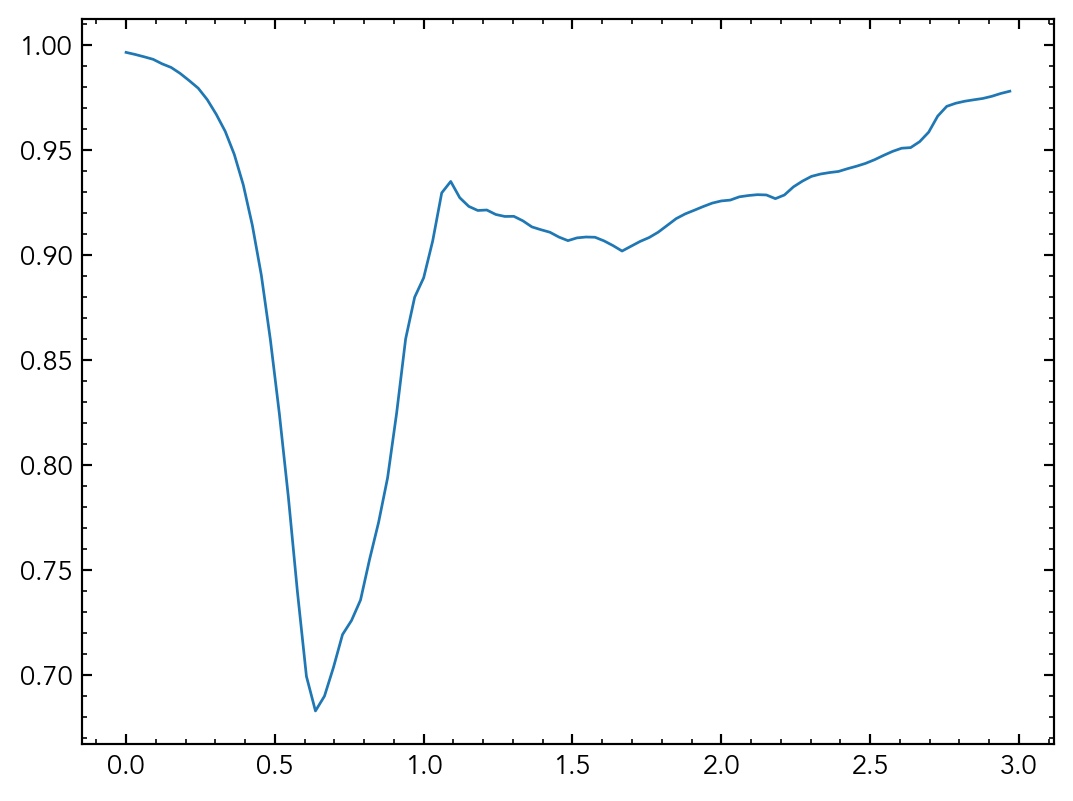

In [8]:
plt.plot(bin_edges[:-1], er_all[-1, :])

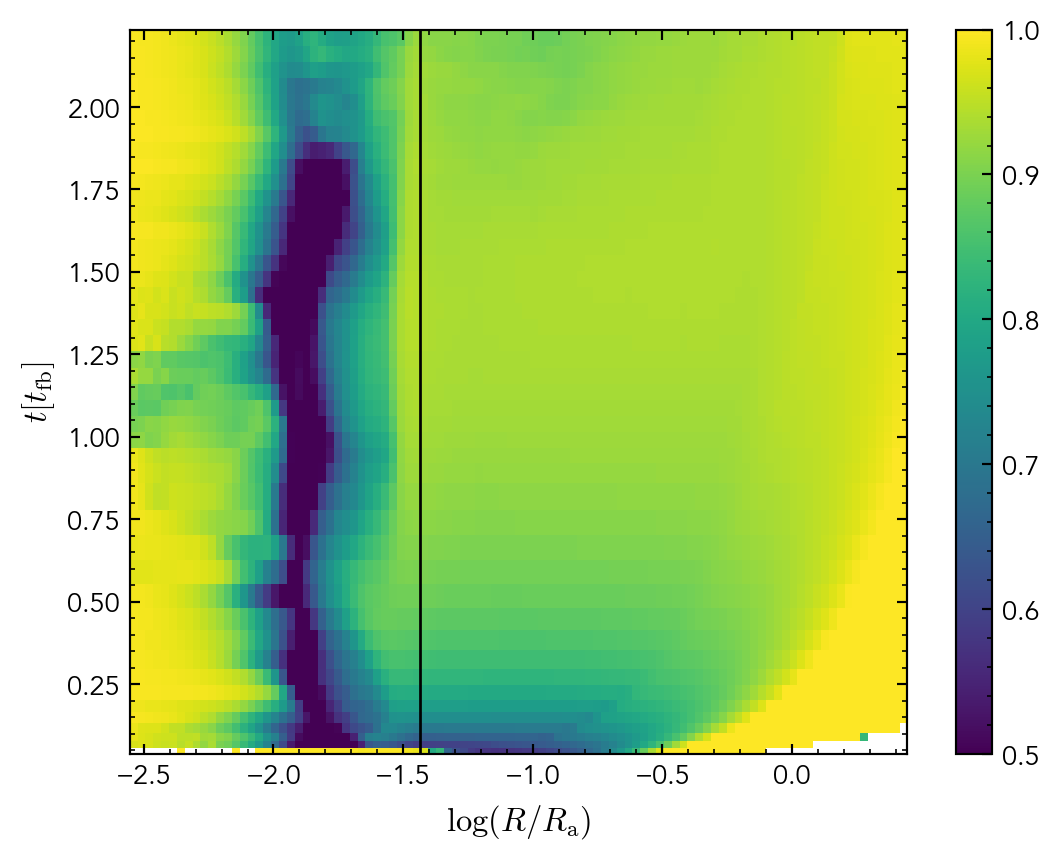

In [19]:
plt.pcolormesh(rspace, tspace, er_all, vmin=0.5, vmax=1)
plt.axvline(np.log10(rt/ra), c='k')
plt.xlabel(r'$\log(R/R_\mathrm{a})$')
plt.ylabel(r'$t[t_\mathrm{fb}]$')
plt.colorbar()
plt.show()

## Plot, for a single snapshot

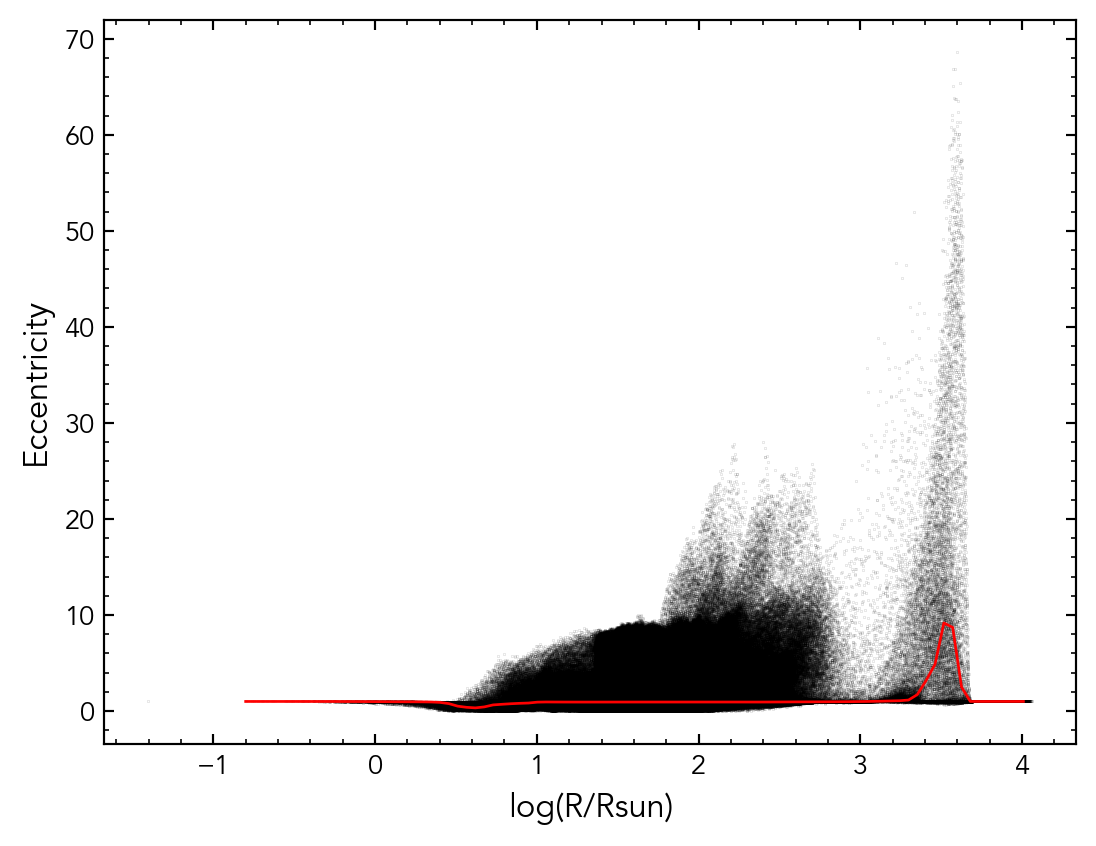

In [69]:
plt.scatter(np.log10(r), e, s=0.001, color='black')
plt.plot(bin_edges[:-1], e_weighted, color='r')
plt.xlabel('log(R/Rsun)')
plt.ylabel('Eccentricity')
plt.show()

## r-2rg or r?

In [90]:
e[55438621]         # snap 100, has e2=-0.03 when using (r-2rg); 0.068 when using r

unyt_quantity(0.06810449, '(dimensionless)')

In [87]:
e2 = 1 + 2*epsilon*j2/(G*Mbh)**2
np.argmin(e2), np.min(e2)

(np.int64(55438621), unyt_quantity(-0.03138287, '(dimensionless)'))

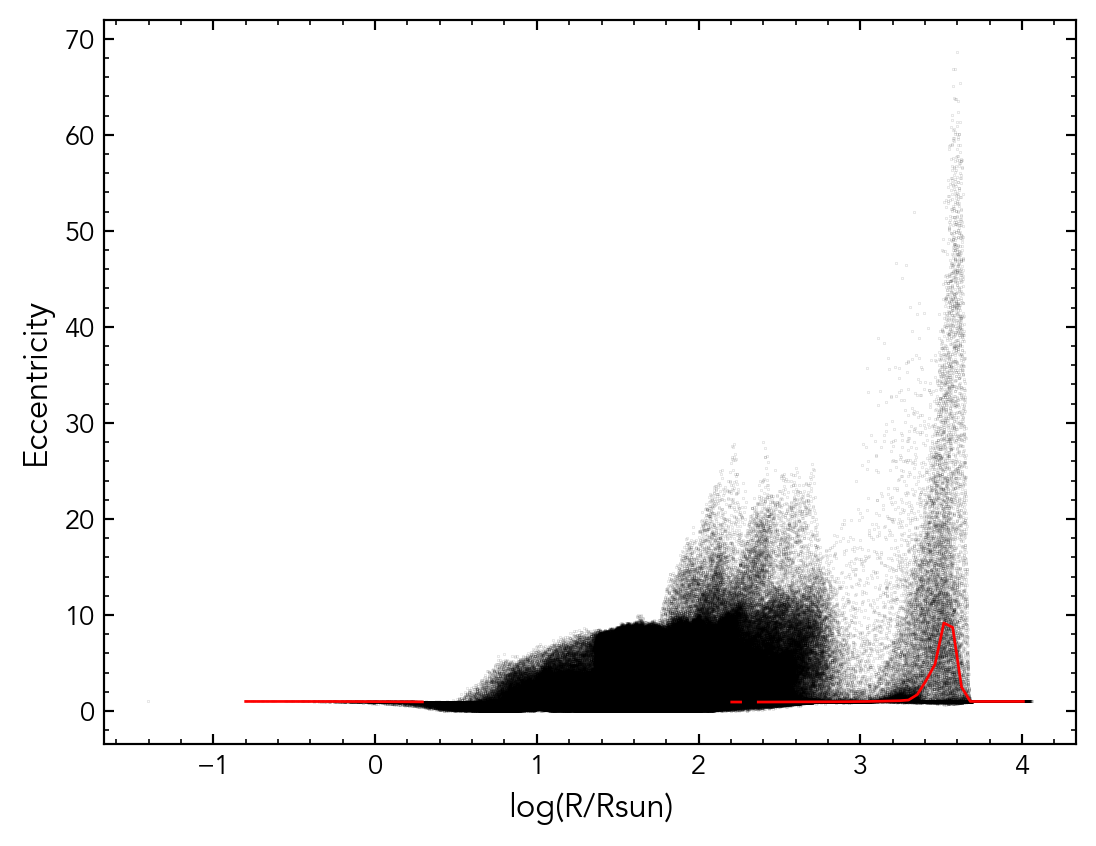

In [73]:
plt.scatter(np.log10(r), e, s=0.001, color='black')
plt.plot(bin_edges[:-1], e_weighted, color='r')
plt.xlabel('log(R/Rsun)')
plt.ylabel('Eccentricity')
plt.show()